# Predicting Annual Fuel Consumption of Motor Vehicle
## Phase 2: Predictive Modelling <br>
### Group Name: ProjectGroup 1
### Adam Wall s3923668
### Kushgar Singh s4027002
### Ayush Tripathi s3941245

## Table of Contents

- [Introduction](#intro)
  - [Dataset Source](#source)
  - [Dataset Details](#details)
  - [Dataset Features](#features)
  - [Target Feature](#target)
- [Goals & Objectives](#go)
- [Data Cleaning & Preprocessing](#cleaning)
  - [Isolating the Features of Interest](#interest)
  - [Pre-processing of Categorical Features](#cat)
  - [Pre-processing of Numeric Features](#num)
- [Predictive Modelling](#predmod)
  - [Feature Selection](#featsel)
  - [Model Fitting & Tuning](#tuning)
  - [Model Comparison](#modeval)
- [Critique & Limitations](#crit)
- [Summary & Conclusions](#sum)
  - [Project Summary](#prosum)
  - [Summary of Findings](#find)
  - [Conclusions](#con)
- [References](#ref)

## Introduction <a id='intro'></a>


### Dataset Source<a id='source'></a>

The source of the dataset on Vehicle Fuel Economy was Kaggle (Maharaj, 2024).  The vehicles included in the dataset include models from 1984 to 2017. The dataset on Kaggle has been compiled from a larger dataset provided by US Department of Energy, Office of Energy Efficiency & Renewable Energy.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
# see all the columns
pd.set_option('display.max_columns', None)

In [2]:
#host the dataset on github with public view for ease of reading
url = 'https://raw.githubusercontent.com/awol380/Machine-Learning-2410-Assignment-Group1/main/fuel.csv'
data = pd.read_csv(url)

#if reading from local drive
#data = pd.read_csv('Phase1_Group1.csv')  

### Dataset Details <a id='details'></a>
The original dataset has 81 features such as transmission, cyclinders, fuel type, fuel consumption and cO2 emissions. There are 38,113 records. The dataset lists one car per record which are independent of each other.

A random sample of 10 observations from the selected dataset has been printed.

In [3]:
data.shape

(38113, 81)

In [4]:
data.sample(n = 10)

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,engine_cylinders,engine_displacement,turbocharger,supercharger,fuel_type,fuel_type_1,fuel_type_2,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,unrounded_city_mpg_ft2,city_gasoline_consumption_cd,city_electricity_consumption,city_utility_factor,highway_mpg_ft1,unrounded_highway_mpg_ft1,highway_mpg_ft2,unrounded_highway_mpg_ft2,highway_gasoline_consumption_cd,highway_electricity_consumption,highway_utility_factor,unadjusted_city_mpg_ft1,unadjusted_highway_mpg_ft1,unadjusted_city_mpg_ft2,unadjusted_highway_mpg_ft2,combined_mpg_ft1,unrounded_combined_mpg_ft1,combined_mpg_ft2,unrounded_combined_mpg_ft2,combined_electricity_consumption,combined_gasoline_consumption_cd,combined_utility_factor,annual_fuel_cost_ft1,annual_fuel_cost_ft2,gas_guzzler_tax,save_or_spend_5_year,annual_consumption_in_barrels_ft1,annual_consumption_in_barrels_ft2,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,tailpipe_co2_ft2,tailpipe_co2_in_grams_mile_ft2,fuel_economy_score,ghg_score,ghg_score_alt_fuel,my_mpg_data,x2d_passenger_volume,x2d_luggage_volume,x4d_passenger_volume,x4d_luggage_volume,hatchback_passenger_volume,hatchback_luggage_volume,start_stop_technology,alternative_fuel_technology,electric_motor,manufacturer_code,gasoline_electricity_blended_cd,vehicle_charger,alternate_charger,hours_to_charge_120v,hours_to_charge_240v,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
7148,5224,1988,Toyota,4Runner 4WD,Special Purpose Vehicles,4-Wheel or All-Wheel Drive,Automatic 4-Speed,2MODE 2LKUP,57098,(FFS),6.0,3.0,NaN,NaN,Regular,Regular Gasoline,NaN,14,0.0000,0,0.0,0.0,0.0,0.0,17,0.0000,0,0.0,0.0,0.0,0.0,17.0000,23.0000,0.0,0.0,15,0.0000,0,0.0,0.0,0.0,0.0,2350,0,NaN,-5000,21.974000,0.0,-1,592.466667,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
466,26637,1984,Chrysler,LeBaron Convertible,Subcompact Cars,NaN,Automatic 3-Speed,NaN,2140,(FFS),4.0,2.6,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0,0.0,0.0,0.0,22,0.0000,0,0.0,0.0,0.0,0.0,23.0000,31.0000,0.0,0.0,20,0.0000,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,80,10,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
31716,32164,2012,Nissan,Juke,Small Station Wagons,Front-Wheel Drive,Manual 6-Speed,NaN,122,NaN,4.0,1.6,True,NaN,Premium,Premium Gasoline,NaN,25,24.7868,0,0.0,0.0,0.0,0.0,30,30.2863,0,0.0,0.0,0.0,0.0,32.0000,43.4000,0.0,0.0,27,26.9924,0,0.0,0.0,0.0,0.0,1550,0,NaN,-1000,12.207778,0.0,-1,329.148148,-1,0.0,-1,-1,-1,N,0,0,86,10,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4393,2841,1986,Jeep,Cherokee/Wagoneer 4WD,Special Purpose Vehicles,4-Wheel or All-Wheel Drive,Manual 5-Speed,SIL,1850,(FFS) (SPFI),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0000,0,0.0,0.0,0.0,0.0,23,0.0000,0,0.0,0.0,0.0,0.0,23.0000,32.0000,0.0,0.0,20,0.0000,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
15481,12665,1996,Toyota,Celica,Subcompact Cars,Front-Wheel Drive,Automatic 4-Speed,NaN,57004,(FFS),4.0,2.2,NaN,NaN,Regular,Regular Gasoline,NaN,19,0.0000,0,0.0,0.0,0.0,0.0,26,0.0000,0,0.0,0.0,0.0,0.0,24.0000,37.0000,0.0,0.0,22,0.0000,0,0.0,0.0,0.0,0.0,1600,0,NaN,-1250,14.982273,0.0,-1,403.954545,-1,0.0,-1,-1,-1,Y,78,10,0,0,77,16,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
13056,11577,1994,Dodge,Dakota Cab Chassis 2WD,Special Purpose Vehicles,Rear-Wheel Drive,Automatic 4-Speed,NaN,2880,(FFS),8.0,5.2,NaN,NaN,Regular,Regular Gasoline,NaN,12,0.0000,0,0.0,0.0,0.0,0.0,16,0.0000,0,0.0,0.0,0.0,0.0,14.4444,22.0000,0.0,0.0,13,0.0000,0,0.0,0.0,0.0,0.0,2700,0,NaN,-6750,25.354615,0.0,-1,683.615385,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,N

### Dataset Features <a id='features'></a>

#### The features of the dataset are described in the table below.

In [5]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['vehicle_id','Integer','NA','Unique number given to each row from which we \ncan access our data'],
         ['year','Integer','Date','When car was manufactured'],
         ['make','Object','NA','Manufacturer or brand the car'],
         ['model','Object','NA','The specific model name or number of the vehicle'],
         ['drive','Object','NA','Drive type of the vehicle.\n 4WD - Four Wheel drive\n 2WD - Two wheel drive\n FWD -  Front wheel drive\n RWD - Rear wheel drive \n AWD - All Wheel drive'],
         ['transmission','Object','NA','Type of transmission installed in the car.'],
         ['engine_cylinders','float','NA','Number of cylinders in the engine of the car'],
         ['engine_displacement','float','cc or L','Volume of engines combustion chambers, it is typically \nmeasured in litres(L) or cc(cubic centimeters)'],
         ['fuel_type','Object','NA','Type of fuel used by car'],
         ['fuel_type_1','Object','NA','Type of fuel used by car'],
         ['city_mpg_ft1','Integer','miles/gallon','City Fuel consumption of the car'],
         ['highway_mpg_ft1','Integer','miles/gallon','Highway Fuel consumption of the car'],
         ['highway_electricity_consumption','float','kWh','Electricity consumed by car when driven on highway'],
         ['combined_mpg_ft1','Integer','miles/gallon','Combined Fuel consumption of the car'],
         ['combined_electricity_consumption','float','kWh','Electricity consumed by car when driven on both highway \nand city'],
         ['annual_fuel_cost_ft1','Integer','USD','Yearly fuel cost of the car'],
         ['annual_consumption_in_barrels_ft1','float','NA','Number of fuel barrels consumed by car in a year'],
         ['tailpipe_co2_in_grams_mile_ft1','float','grams','Emission of Carbon Dioxide in grams'],
        ['start_stop_technology','float','NA','Indicates whether vehicle is equipped with start stop \ntechnology. It automatically shuts off engine when car \nstops to save fuel.']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════════════════╤═════════════╤══════════════╤══════════════════════════════════════════════════════════╕
│ Name                              │ Data Type   │ Units        │ Description                                              │
╞═══════════════════════════════════╪═════════════╪══════════════╪══════════════════════════════════════════════════════════╡
│ vehicle_id                        │ Integer     │ NA           │ Unique number given to each row from which we            │
│                                   │             │              │ can access our data                                      │
├───────────────────────────────────┼─────────────┼──────────────┼──────────────────────────────────────────────────────────┤
│ year                              │ Integer     │ Date         │ When car was manufactured                                │
├───────────────────────────────────┼─────────────┼──────────────┼────────────────────────────────────────────────────

### Target Feature <a id='target'></a>
For this project we chose 'annual_consumption_in_barrels_ft1' as the target feature. This target feature is a numeric feature, as it measures the annual fuel consumed by vehicle of specific make and model in barrels. This target feature can get reveal more insights regarding the fuel efficiencies of vehicles and their impact on environment. In fuel efficiency comparison, if the vehicle is consuming less fuel then it will have lower annual fuel consumption. This may attract more consumers who are interested in owning a fuel efficient car.
We can also predict the environmental impact by checking vehicle with higher values in annual fuel consumption in barrels. These vehicles will have greater environmental impact. Overall, 'annual_consumption_in_barrels_ft1' can provide some meaningful insights which can help consumers choose the right vehicle depending on their needs and preferences.

## Goals & Objectives <a id='go'></a>

The goal for the first phase of this project is to prepare and understand the dataset. This is critical to being able to build a predictive model in the second phase.

Preparing the dataset is completed by making sure it has been appropriately pre-processed including dropping unnecessary or redudant features, constant or empty features, and tidying up the values where there is white space or different naming conventions. Numeric features should also be pre-processed to ensure no missing values. All remaining features should be relevant to the ultimate goal of predicting annual fuel consumption of a vehicle.

Understanding the dataset and it's features is enabled by visualisation of the features in a variety of plots and summary tables. Relationships can be elucidated by bringing together more than 1 variable in a single visualisation. The objective of creating data visualisations is to understand how features may influence the annual fuel consumption of a vehicle.





## Data Cleaning & Preprocessing <a id='cleaning'></a>


### Isolating the features of interest <a id='interest'></a>

In [6]:
data.columns.to_list()

['vehicle_id',
 'year',
 'make',
 'model',
 'class',
 'drive',
 'transmission',
 'transmission_type',
 'engine_index',
 'engine_descriptor',
 'engine_cylinders',
 'engine_displacement',
 'turbocharger',
 'supercharger',
 'fuel_type',
 'fuel_type_1',
 'fuel_type_2',
 'city_mpg_ft1',
 'unrounded_city_mpg_ft1',
 'city_mpg_ft2',
 'unrounded_city_mpg_ft2',
 'city_gasoline_consumption_cd',
 'city_electricity_consumption',
 'city_utility_factor',
 'highway_mpg_ft1',
 'unrounded_highway_mpg_ft1',
 'highway_mpg_ft2',
 'unrounded_highway_mpg_ft2',
 'highway_gasoline_consumption_cd',
 'highway_electricity_consumption',
 'highway_utility_factor',
 'unadjusted_city_mpg_ft1',
 'unadjusted_highway_mpg_ft1',
 'unadjusted_city_mpg_ft2',
 'unadjusted_highway_mpg_ft2',
 'combined_mpg_ft1',
 'unrounded_combined_mpg_ft1',
 'combined_mpg_ft2',
 'unrounded_combined_mpg_ft2',
 'combined_electricity_consumption',
 'combined_gasoline_consumption_cd',
 'combined_utility_factor',
 'annual_fuel_cost_ft1',
 'annual

In [7]:
#dropping columns from the original dataset
data = data.loc[:,['vehicle_id','year','make','model','class','drive','transmission','engine_cylinders','engine_displacement','fuel_type','fuel_type_1','city_mpg_ft1','highway_mpg_ft1','highway_electricity_consumption','combined_mpg_ft1','combined_electricity_consumption','annual_fuel_cost_ft1','annual_consumption_in_barrels_ft1','tailpipe_co2_in_grams_mile_ft1','start_stop_technology']]

In [8]:
data.shape

(38113, 20)

In [9]:
data = data.set_index('vehicle_id')

In [10]:
data.isna().sum() #identify empty variables

year                                     0
make                                     0
model                                    0
class                                    0
drive                                 1189
transmission                            11
engine_cylinders                       136
engine_displacement                    134
fuel_type                                0
fuel_type_1                              0
city_mpg_ft1                             0
highway_mpg_ft1                          0
highway_electricity_consumption          0
combined_mpg_ft1                         0
combined_electricity_consumption         0
annual_fuel_cost_ft1                     0
annual_consumption_in_barrels_ft1        0
tailpipe_co2_in_grams_mile_ft1           0
start_stop_technology                38113
dtype: int64

In [11]:
data = data.drop(['start_stop_technology'], axis=1)

In [12]:
data = data.dropna() #low volumes of NA values, less than 10% of dataset. Many are categorical which cannot be imputed by numeric means.

In [13]:
data.nunique() #identify any constant columns

year                                   34
make                                  127
model                                3662
class                                  34
drive                                   7
transmission                           45
engine_cylinders                        9
engine_displacement                    65
fuel_type                              13
fuel_type_1                             5
city_mpg_ft1                           52
highway_mpg_ft1                        50
highway_electricity_consumption        24
combined_mpg_ft1                       49
combined_electricity_consumption       27
annual_fuel_cost_ft1                   58
annual_consumption_in_barrels_ft1     135
tailpipe_co2_in_grams_mile_ft1        590
dtype: int64

In [14]:
data = data.drop_duplicates(subset=data.columns.difference(['vehicle_id'])) #drop duplicate rows

### Pre-processing of Categorical Features <a id='cat'></a>

In [15]:
data.describe(include=object) #summarise categorical features

,make,model,class,drive,transmission,fuel_type,fuel_type_1
count,36209,36209,36209,36209,36209,36209,36209
unique,127,3662,34,7,45,13,5
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,Regular,Regular Gasoline
freq,3657,199,5197,13107,10585,23769,25034


In [16]:
categorical_features= list(data.columns[data.dtypes == object])

In [17]:
for feature in categorical_features:
  print(f'{feature}')
  print(data[feature].unique())
  print("\n")
  #engine_cylinders nan

make
['AM General' 'American Motors Corporation' 'Buick' 'Cadillac' 'Chevrolet'
 'Dodge' 'Ford' 'GMC' 'Grumman Olson' 'Import Foreign Auto Sales Inc'
 'Isuzu' 'Jeep' 'Mazda' 'Mitsubishi' 'Nissan' 'Plymouth'
 'S and S Coach Company  E.p. Dutton' 'Subaru'
 'Superior Coaches Div E.p. Dutton' 'Suzuki' 'Toyota' 'Volkswagen'
 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bertone'
 'Bill Dovell Motor Car Company' 'BMW' 'Chrysler' 'E. P. Dutton, Inc.'
 'Ferrari' 'Honda' 'Jaguar' 'Lincoln' 'Lotus' 'Maserati' 'Mercedes-Benz'
 'Mercury' 'Merkur' 'Oldsmobile' 'Peugeot' 'Pininfarina' 'Pontiac'
 'Porsche' 'Renault' 'Rolls-Royce' 'Saab' 'TVR Engineering Ltd' 'Volvo'
 'Acura' 'Autokraft Limited' 'Bitter Gmbh and Co. Kg' 'Hyundai'
 'Lambda Control Systems' 'Lamborghini' 'London Coach Co Inc'
 'Panther Car Company Limited' 'Texas Coach Company' 'Vixen Motor Company'
 'Volga Associated Automobile' 'Yugo' 'ASC Incorporated' 'CCC Engineering'
 'CX Automotive' 'Excalibur Autos' 'Land Rover' 'Mcevoy Motors'
 'Red Shif

In [18]:
#Data prep for data['class'] feature
data['class'] = data['class'].str.replace('2WD','', case=False)
data['class'] = data['class'].str.replace('4WD','', case=False)
data['class'] = data['class'].str.replace('/','', case=False)
data['class'] = data['class'].str.replace(' -','', case=False)
data['class'] = data['class'].str.strip()
data['class'].unique()

array(['Special Purpose Vehicle', 'Large Cars', 'Standard Pickup Trucks',
       'Vans, Passenger Type', 'Vans, Cargo Type',
       'Special Purpose Vehicles', 'Small Pickup Trucks',
       'Minicompact Cars', 'Two Seaters', 'Subcompact Cars',
       'Midsize Cars', 'Midsize-Large Station Wagons', 'Compact Cars',
       'Small Station Wagons', 'Vans', 'Vans Passenger',
       'Midsize Station Wagons', 'Sport Utility Vehicle', 'Minivan',
       'Small Sport Utility Vehicle', 'Standard Sport Utility Vehicle'],
      dtype=object)

In [19]:
data['class'] = data['class'].str.replace('Special Purpose Vehicles','Special Purpose Vehicle')
data['class'] = data['class'].str.replace('Vans Passenger','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Minivan','Vans, Passenger Type')
data['class'] = data['class'].str.replace('Standard ','')
data['class'].value_counts()

Compact Cars                    5197
Pickup Trucks                   4429
Subcompact Cars                 4397
Sport Utility Vehicle           4296
Midsize Cars                    4115
Special Purpose Vehicle         2253
Two Seaters                     1790
Large Cars                      1778
Small Station Wagons            1373
Minicompact Cars                1222
Small Pickup Trucks             1147
Vans                            1121
Small Sport Utility Vehicle      922
Vans, Passenger Type             685
Midsize-Large Station Wagons     633
Vans, Cargo Type                 432
Midsize Station Wagons           419
Name: class, dtype: int64

In [20]:
#Data prep for data['transmission'] feature
data['transmission'].value_counts()

Automatic 4-Speed                   10585
Manual 5-Speed                       7799
Automatic (S6)                       2680
Automatic 3-Speed                    2597
Manual 6-Speed                       2442
Automatic 5-Speed                    2178
Automatic 6-Speed                    1447
Manual 4-Speed                       1306
Automatic (S8)                        977
Automatic (S5)                        825
Automatic (variable gear ratios)      696
Automatic 7-Speed                     673
Automatic (S7)                        270
Auto(AM-S7)                           266
Automatic 8-Speed                     259
Automatic (S4)                        229
Auto(AM7)                             161
Auto(AV-S6)                           153
Auto(AM6)                             120
Automatic 9-Speed                     105
Auto(AM-S6)                            87
Auto(AV-S7)                            80
Manual 3-Speed                         74
Manual 7-Speed                    

In [21]:
data['transmission'] = data['transmission'].str.replace('Automatic','Auto')
data[['transmission', 'gears']] = data['transmission'].str.split(' ', n = 1, expand=True)
data[['transmission', 'gears2']] = data['transmission'].str.split('(', n = 1, expand=True)
data['transmission'].value_counts()

Auto      24511
Manual    11698
Name: transmission, dtype: int64

In [22]:
#Data prep for new feature data['gear']
data['gears'].fillna(data['gears2'])
data = data.drop(['gears2'], axis=1)
data['gears'] = data['gears'].str.extract('(\d+)')
data['gears'].value_counts() #to show the range of gears

4     12120
5     10805
6      6585
3      2671
8      1237
7      1016
9       134
10        8
1         5
Name: gears, dtype: int64

In [23]:
from pandas.api.types import CategoricalDtype
cats = CategoricalDtype(categories=["1", "2", "3","4","5","6","7","8","9","10"], ordered=True)
data['gears'] = data['gears'].astype(cats)

In [24]:
#Data prep for data['fuel_type'] feature
data['fuel_type'].value_counts()

Regular                        23769
Premium                        10049
Gasoline or E85                 1215
Diesel                           824
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: fuel_type, dtype: int64

In [25]:
fuel_df = data.loc[:,['fuel_type','fuel_type_1']]
pd.pivot_table(fuel_df, index='fuel_type', columns='fuel_type_1', aggfunc=len, fill_value=0)

fuel_type_1,Diesel,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
fuel_type,,,,,
CNG,0,0,60,0,0
Diesel,824,0,0,0,0
Gasoline or E85,0,0,0,0,1215
Gasoline or natural gas,0,0,0,0,20
Gasoline or propane,0,0,0,0,8
Midgrade,0,77,0,0,0
Premium,0,0,0,10049,0
Premium Gas or Electricity,0,0,0,18,0
Premium and Electricity,0,0,0,25,0


In [26]:
data.loc[data['fuel_type'] == 'Premium Gas or Electricity', 'fuel_type_1'] = 'Premium Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas or Electricity', 'fuel_type_1'] = 'Regular Plug-in Hybrid'
data.loc[data['fuel_type'] == 'Premium Gas and Electricity', 'fuel_type_1'] = 'Premium Hybrid'
data.loc[data['fuel_type'] == 'Regular Gas and Electricity', 'fuel_type_1'] = 'Regular Hybrid'
data = data.drop(['fuel_type'], axis=1)

### Pre-processing of Numeric features <a id='num'></a>

In [27]:
data.describe(include=np.number).round(2) #summarise numeric features

,year,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_in_grams_mile_ft1
count,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00,36209.00
mean,2000.84,5.76,3.34,17.66,23.83,0.08,19.92,0.08,1981.90,17.60,475.03
std,10.16,1.76,1.36,4.77,5.79,1.90,5.08,1.88,528.17,4.46,118.79
min,1984.00,2.00,0.60,6.00,9.00,0.00,7.00,0.00,600.00,0.06,29.00
25%,1992.00,4.00,2.20,15.00,20.00,0.00,16.00,0.00,1600.00,14.70,395.00
50%,2002.00,6.00,3.00,17.00,24.00,0.00,19.00,0.00,1950.00,17.35,467.74
75%,2010.00,6.00,4.30,20.00,27.00,0.00,23.00,0.00,2350.00,20.60,555.44
max,2017.00,16.00,8.40,58.00,61.00,71.00,58.00,71.00,6050.00,47.09,1269.57


In [28]:
#Here we are doing binning for or data and converting some numeric features to represent different levels.
#First we will define the bin edges
displacement_bins = [0,2,3, float('inf')]
engine_displacement_binned = pd.cut(data['engine_displacement'], bins=displacement_bins, labels=['<2','2-3','>3'])#In <2 2 is not included
print(engine_displacement_binned)

vehicle_id
27550    2-3
27549     >3
27593     >3
28455     >3
27591    2-3
        ... 
37564     <2
37547     <2
37548     <2
37703     <2
37687     <2
Name: engine_displacement, Length: 36209, dtype: category
Categories (3, object): ['<2' < '2-3' < '>3']


In [29]:
#Check for any missing values
data['engine_displacement'].isna().sum()
data['drive'].isna().sum()

0

In [30]:
#Check for the number of same values in drive column
drive_count = data['drive'].value_counts()
print(drive_count)

Front-Wheel Drive             13107
Rear-Wheel Drive              12811
4-Wheel or All-Wheel Drive     6503
All-Wheel Drive                2093
4-Wheel Drive                  1097
2-Wheel Drive                   423
Part-time 4-Wheel Drive         175
Name: drive, dtype: int64


In [31]:
data['drive'] = data['drive'].str.replace('Front-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('Rear-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('4-Wheel or All-Wheel Drive','4|All Wheel ')
data['drive'] = data['drive'].str.replace('All-Wheel Drive','All Wheel')
data['drive'] = data['drive'].str.replace('4-Wheel Drive','4')
data['drive'] = data['drive'].str.replace('2-Wheel Drive','2')
data['drive'] = data['drive'].str.replace('Part-time 4','4')
print(data['drive'].value_counts())

2               26341
4|All Wheel      6503
All Wheel        2093
4                1272
Name: drive, dtype: int64


In [32]:
#Getting mean of city mileage and highway mileage
city_mean = data.groupby('make')['city_mpg_ft1'].mean()
data['make_encoded'] = data['make'].map(city_mean)
print(city_mean)

highway_mean = data.groupby('make')['highway_mpg_ft1'].mean()
data['make_encoded'] = data['make'].map(highway_mean)
print(highway_mean)

make
AM General                     15.000000
ASC Incorporated               14.000000
Acura                          18.897351
Alfa Romeo                     17.533333
American Motors Corporation    16.045455
                                 ...    
Volkswagen                     20.845155
Volvo                          17.987465
Wallace Environmental          12.437500
Yugo                           23.000000
smart                          33.090909
Name: city_mpg_ft1, Length: 127, dtype: float64
make
AM General                     15.000000
ASC Incorporated               21.000000
Acura                          25.874172
Alfa Romeo                     24.488889
American Motors Corporation    20.181818
                                 ...    
Volkswagen                     28.387612
Volvo                          25.043175
Wallace Environmental          16.000000
Yugo                           28.250000
smart                          39.090909
Name: highway_mpg_ft1, Length: 127, dtyp

In [33]:
data.info() #identify any constant columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36209 entries, 27550 to 37687
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   year                               36209 non-null  int64   
 1   make                               36209 non-null  object  
 2   model                              36209 non-null  object  
 3   class                              36209 non-null  object  
 4   drive                              36209 non-null  object  
 5   transmission                       36209 non-null  object  
 6   engine_cylinders                   36209 non-null  float64 
 7   engine_displacement                36209 non-null  float64 
 8   fuel_type_1                        36209 non-null  object  
 9   city_mpg_ft1                       36209 non-null  int64   
 10  highway_mpg_ft1                    36209 non-null  int64   
 11  highway_electricity_consumption    36

In [68]:
#need to check for outliers

In [61]:
data = data.drop(columns = ['year','make','model'])

In [62]:
data = data[[c for c in data.columns if c != 'annual_consumption_in_barrels_ft1'] + ['annual_consumption_in_barrels_ft1']] #moving columns
data_sample = data.sample(n=5000, random_state=999).reset_index(drop=True)
target = data_sample['annual_consumption_in_barrels_ft1']
Data_df = data_sample.drop(columns = 'annual_consumption_in_barrels_ft1')

In [63]:
categorical_cols = Data_df.columns[Data_df.dtypes==object].tolist()
for col in categorical_cols:
    n = len(Data_df[col].unique())
    if n == 2:
        Data_df[col] = pd.get_dummies(Data_df[col], drop_first=True)

In [64]:
# for categorical features with >2 levels: use one-hot-encoding
Data_df = pd.get_dummies(Data_df)

In [66]:
from sklearn import preprocessing
Data_df_cols = Data_df.columns
# scale Data between 0 and 1
# set the output to a data frame with correct column names
Data_df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(Data_df), 
                    columns=Data_df_cols)

In [67]:
Data_df

,transmission,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,highway_electricity_consumption,combined_mpg_ft1,combined_electricity_consumption,annual_fuel_cost_ft1,tailpipe_co2_in_grams_mile_ft1,make_encoded,class_Compact Cars,class_Large Cars,class_Midsize Cars,class_Midsize Station Wagons,class_Midsize-Large Station Wagons,class_Minicompact Cars,class_Pickup Trucks,class_Small Pickup Trucks,class_Small Sport Utility Vehicle,class_Small Station Wagons,class_Special Purpose Vehicle,class_Sport Utility Vehicle,class_Subcompact Cars,class_Two Seaters,class_Vans,"class_Vans, Cargo Type","class_Vans, Passenger Type",drive_2,drive_4,drive_4|All Wheel,drive_All Wheel,fuel_type_1_Diesel,fuel_type_1_Midgrade Gasoline,fuel_type_1_Natural Gas,fuel_type_1_Premium Gasoline,fuel_type_1_Premium Plug-in Hybrid,fuel_type_1_Regular Gasoline,fuel_type_1_Regular Hybrid,gears_1,gears_2,gears_3,gears_4,gears_5,gears_6,gears_7,gears_8,gears_9,gears_10
0,0.0,0.285714,0.384615,0.229167,0.372549,0.0,0.282609,0.0,0.215054,0.358637,0.539142,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.285714,0.410256,0.229167,0.352941,0.0,0.282609,0.0,0.215054,0.364359,0.390291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.428571,0.705128,0.083333,0.098039,0.0,0.086957,0.0,0.612903,0.657732,0.368893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.428571,0.679487,0.083333,0.117647,0.0,0.086957,0.0,0.483871,0.657732,0.339819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.285714,0.371795,0.208333,0.294118,0.0,0.239130,0.0,0.258065,0.405534,0.390291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.285714,0.282051,0.166667,0.274510,0.0,0.217391,0.0,0.279570,0.429553,0.399490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.285714,0.346154,0.166667,0.196078,0.0,0.173913,0.0,0.333333,0.486597,0.468512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.285714,0.307692,0.270833,0.392157,0.0,0.326087,0.0,0.258065,0.328134,0.501253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4998,0.0,0.142857,0.153846,0.270833,0.352941,0.0,0.326087,0.0,0.258065,0.330344,0.495598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(Data_df.values, 
                                                    target.values, 
                                                    shuffle=True,
                                                    test_size=0.3, 
                                                    random_state=999)

## Predictive Modelling <a id='predmod'></a>

### Feature Selection <a id='featsel'></a>

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv_method = RepeatedKFold(n_splits=5,
                          n_repeats=3,
                          random_state=999)

In [87]:
reg = DecisionTreeRegressor(random_state=999)

In [88]:
cv_results_full = cross_val_score(estimator=reg,
                             X=D_train,
                             y=t_train, 
                             cv=cv_method)

In [89]:
cv_results_full.mean().round(3)

0.975

In [90]:
num_features = 5

In [92]:
model_rfi = RandomForestRegressor(n_estimators=100)
model_rfi.fit(D_train, t_train)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [96]:
best_features_rfi = Data_df.columns[fs_indices_rfi].values
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print(best_features_rfi,feature_importances_rfi)

['tailpipe_co2_in_grams_mile_ft1' 'combined_mpg_ft1'
 'fuel_type_1_Natural Gas' 'city_mpg_ft1' 'highway_mpg_ft1'] [0.95684537 0.02592781 0.00862365 0.00392399 0.00300598]


In [97]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

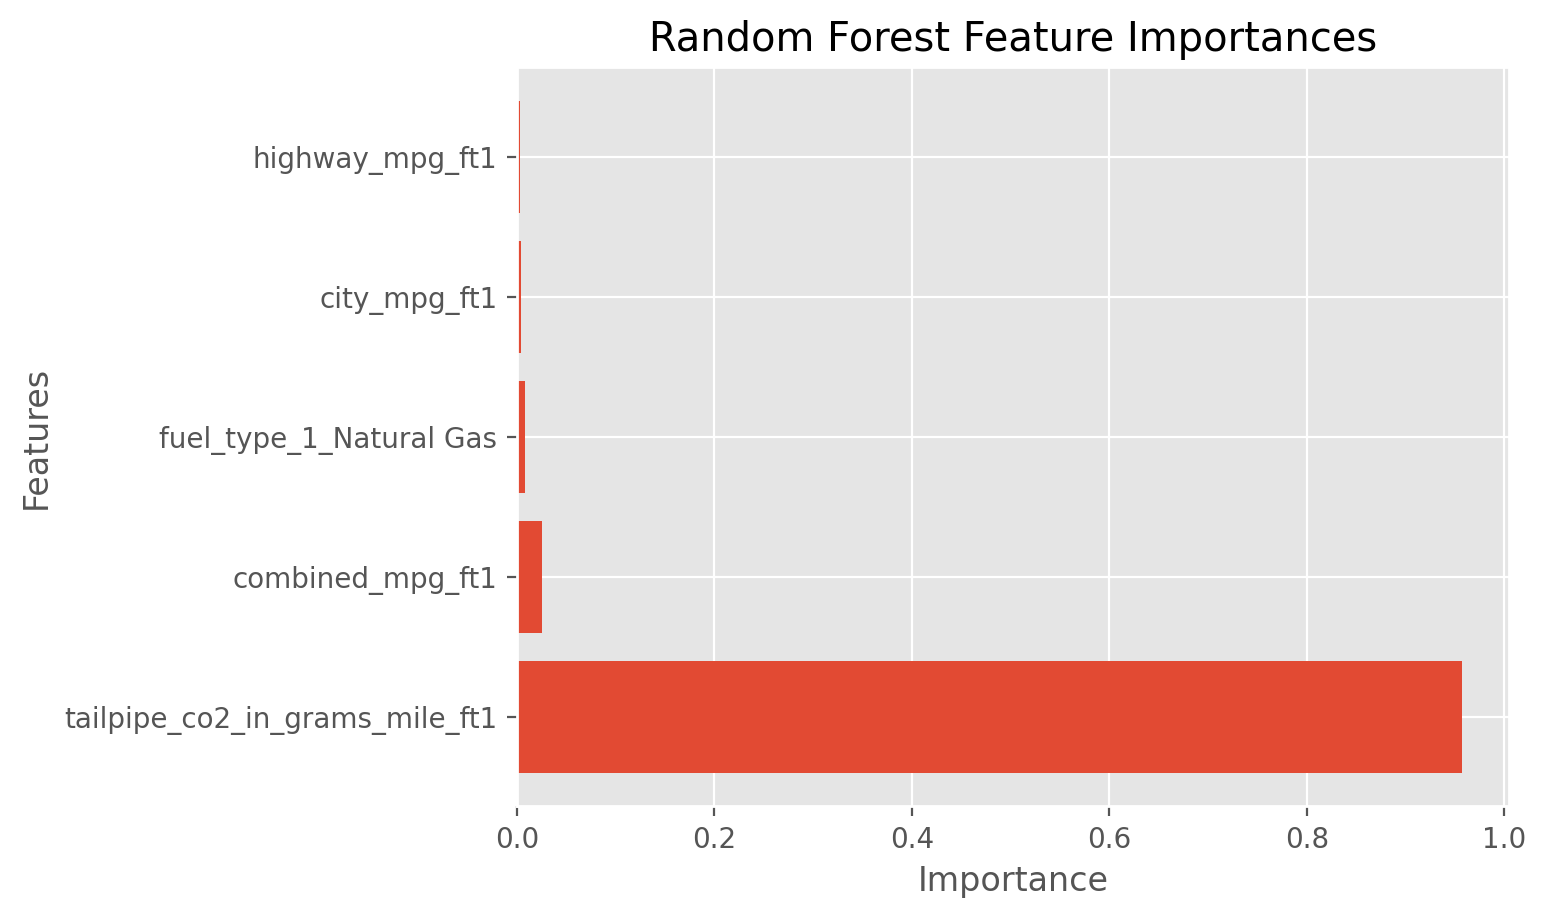

In [98]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

### Model Fitting & Tuning <a id='tuning'></a>

### Model Comparison <a id='modeval'></a>

## Critique & Limitations <a id='crit'></a>

## Summary & Conclusions <a id='sum'></a>

### Project Summary <a id='prosum'></a>

### Summary of Findings <a id='find'></a>

### Conclusions <a id='con'></a>

## References <a id='ref'></a>
#### Maharaj, S. (2024). *Vehicle Fuel Economy* [Data set]. Kaggle. https://www.kaggle.com/datasets/sahirmaharajj/fuel-economy

#### Royal Automotive Club of Victoria. (2024). *AWD vs 4WD: What's the difference?*. https://www.racv.com.au/royalauto/transport/cars/difference-between-4wd-awd-suv.html

#### US Department of Energy. (2024). *FuelEconomy.gov Web Services*. https://www.fueleconomy.gov/feg/ws/#ft11